## Detecting malaria using convolutional neural network


The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


#### Save humans by detecting and deploying Image Cells that contain Malaria or not!


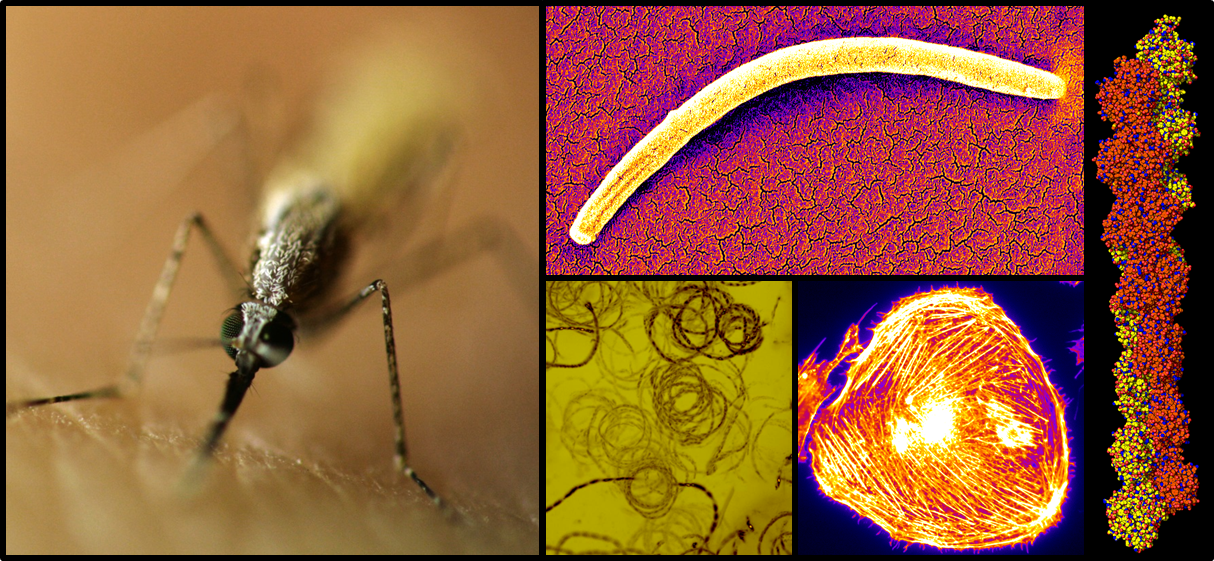

1.Importing Libraries.
2.Loading the data.
3.Data preprocessing.
4.Data augmentation.
5.Ploting images and its labels to understand how does an infected cell and uninfected cell looks like.
6.Spliting data in Train , Evaluation and Test set.
7.Creating a Convolution Neural Network function.
8.Wrapping it with Tensorflow Estimator function.
9.Training the data on Train data.
10.Evaluating on evaluation data.
11.Predicting on Test data

In [30]:
#importing libraries
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
parasitized_data = os.listdir('cell_images/train/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('cell_images/train/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png', 'C100P61ThinF_IMG_20150918_144348_cell_138.png', 'C100P61ThinF_IMG_20150918_144348_cell_139.png', 'C100P61ThinF_IMG_20150918_144348_cell_140.png', 'C100P61ThinF_IMG_20150918_144348_cell_141.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png', 'C100P61ThinF_IMG_20150918_144348_cell_125.png']


### Infected Cells

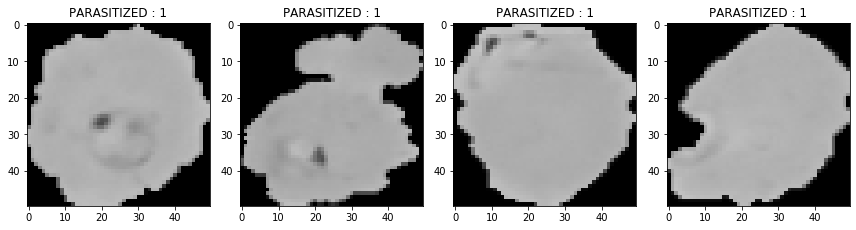

In [32]:

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/train/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

# Uninfected Cells

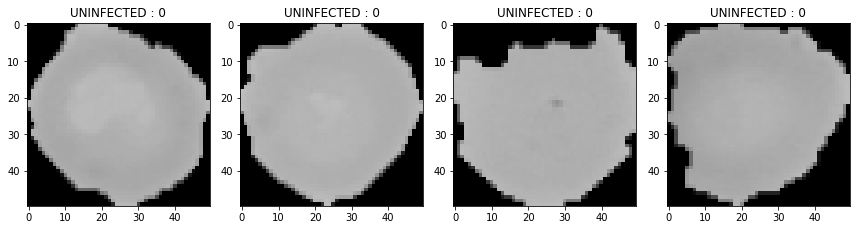

In [33]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/train/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

_<b>One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.</b>_

### BUILDING THE CNN MODEL

In [38]:
# initialising the CNN
classifier = Sequential()

In [39]:
#step 1 Convolution
#performed in identifing features of image
#It helps in blurring, sharpening , edge detection , noise reduction in images so that it helps in image to indetify its charachtersitcs and features
classifier.add(Convolution2D(32, 3, 3, input_shape= (64, 64, 3), activation = 'relu'))

#step 2 - Pooling
#sometimes the image being processed is too large so pooling is done in order to reduce the size of the image without loosing its important features
classifier.add(MaxPooling2D(pool_size = (2,2)))

#2nd layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#step 3 - Flattening
#Flattening will transform my 2 dimensional features to the vector of features that can be directly fed into real classifier or neural networks
classifier.add(Flatten())

#step-4 Full connection
# this is the process of reading the flatten image into the neural network. The units mentioned are number of nodes in the layer and activation is activtion function in each node
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))


In [40]:
# compile the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
#shear range is the intensity
#zoom_range is the random zooming of the image
test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [43]:
test_set = test_datagen.flow_from_directory('cell_images/valid',
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [46]:
classifier.fit_generator(training_set,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = test_set,
                        nb_val_samples = 2000)

Epoch 1/25
250/250 [==============================] - 162s 647ms/step - loss: 0.6831 - accuracy: 0.5641 - val_loss: 0.6569 - val_accuracy: 0.5901
Epoch 2/25
250/250 [==============================] - 156s 623ms/step - loss: 0.6674 - accuracy: 0.5998 - val_loss: 0.5619 - val_accuracy: 0.6587
Epoch 3/25
250/250 [==============================] - 135s 540ms/step - loss: 0.6482 - accuracy: 0.6230 - val_loss: 0.6044 - val_accuracy: 0.6694
Epoch 4/25
250/250 [==============================] - 99s 396ms/step - loss: 0.6319 - accuracy: 0.6394 - val_loss: 0.6618 - val_accuracy: 0.7034
Epoch 5/25
250/250 [==============================] - 104s 415ms/step - loss: 0.5517 - accuracy: 0.7206 - val_loss: 0.5635 - val_accuracy: 0.7473
Epoch 6/25
250/250 [==============================] - 105s 422ms/step - loss: 0.4719 - accuracy: 0.7795 - val_loss: 0.3454 - val_accuracy: 0.8511
Epoch 7/25
250/250 [==============================] - 105s 422ms/step - loss: 0.3359 - accuracy: 0.8642 - val_loss: 0.1960 - 

Not infected


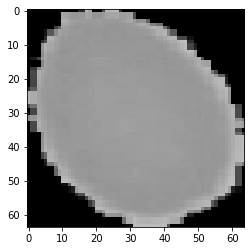

In [47]:
#test a new single image
test_image1= image.load_img('cell_images/random1.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


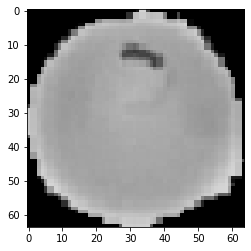

In [48]:
#test a new single image
test_image1= image.load_img('cell_images/random2.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Not infected


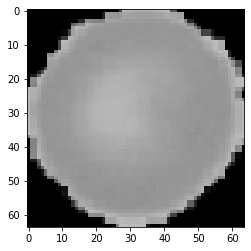

In [49]:
#test a new single image
test_image1= image.load_img('cell_images/random3.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


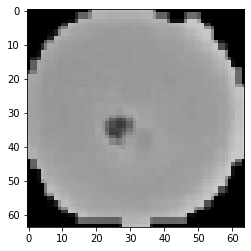

In [50]:
#test a new single image
test_image1= image.load_img('cell_images/random4.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

Infected **


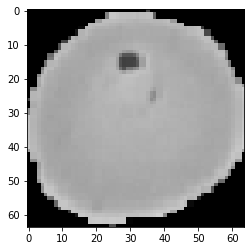

In [51]:
#test a new single image
test_image1= image.load_img('cell_images/random5.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>= 0.5:
    prediction= 'Not infected'
else:
    prediction = 'Infected **'

print(prediction)
plt.imshow(test_image1)

In [ ]:
#Conclusion 
